In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib in line
import math

UsageError: unrecognized arguments: line


In [305]:
train=pd.read_csv('F:train.csv')
test=pd.read_csv('F:test.csv')

In [306]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
train.shape

(891, 12)

exploratory data analysis

In [308]:
##data analysationand visualization

<Axes: xlabel='Survived', ylabel='count'>

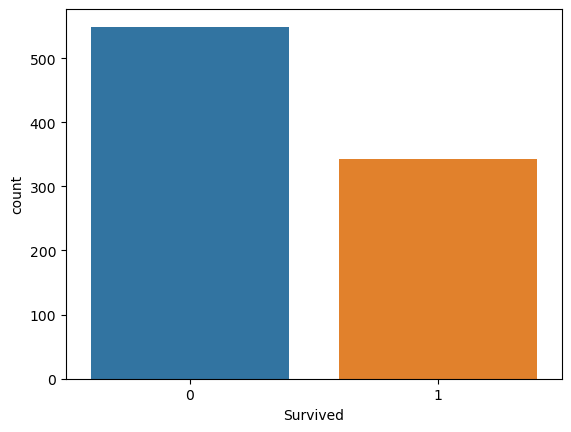

In [309]:
sns.countplot(x="Survived", data=train)

<Axes: xlabel='Survived', ylabel='count'>

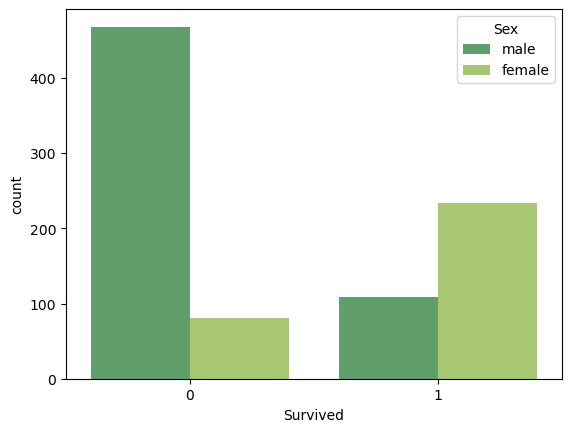

In [310]:
sns.countplot(x="Survived", hue= 'Sex', data=train, palette='summer')

In [311]:
## 0 represents that the persondid not survived where as 1 represents that he/she did

<Axes: xlabel='Survived', ylabel='count'>

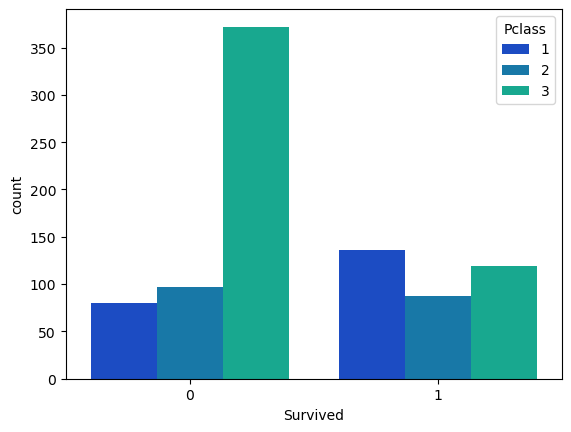

In [312]:
sns.countplot(x="Survived", hue= 'Pclass', data=train, palette='winter')

In [313]:
## higher the class, higher is the chance of he/she surviving

<Axes: ylabel='Frequency'>

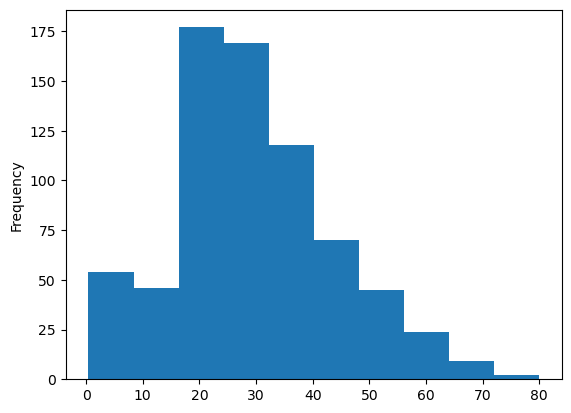

In [314]:
train['Age'].plot.hist()

<Axes: ylabel='Frequency'>

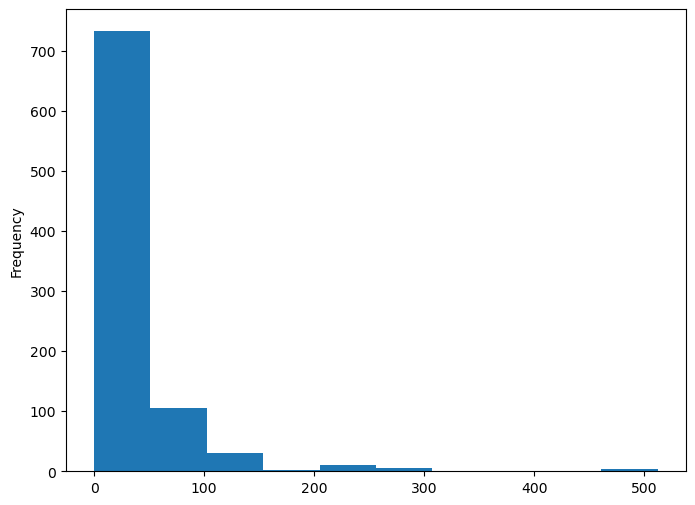

In [315]:
train['Fare'].plot.hist(bins=10, figsize=(8,6))

In [316]:
##we can see that most of the tickets bought are under 100

<Axes: xlabel='SibSp', ylabel='count'>

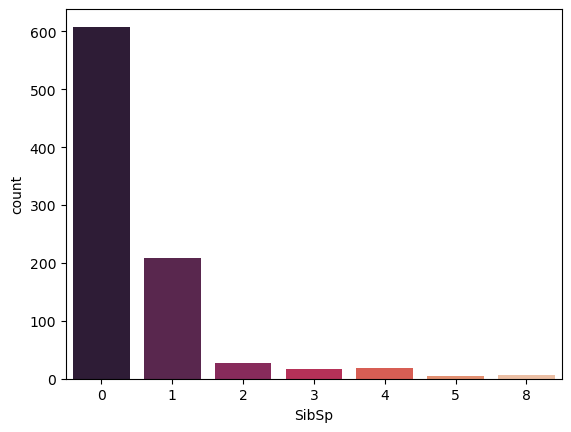

In [317]:
sns.countplot(x='SibSp', data=train, palette='rocket')

<Axes: ylabel='Frequency'>

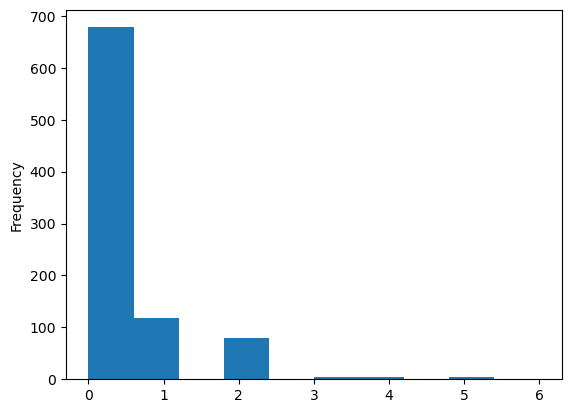

In [318]:
train['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

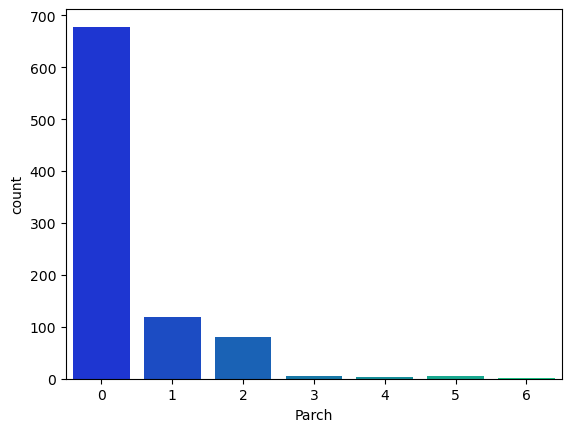

In [319]:
sns.countplot(x='Parch', data=train, palette= 'winter')

In [320]:
titanic_len = len(train)
titanic = pd.concat([train,test],axis = 0)
titanic = titanic.reset_index(drop=True)   #to drop the index

In [321]:
##removal of null values

In [322]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

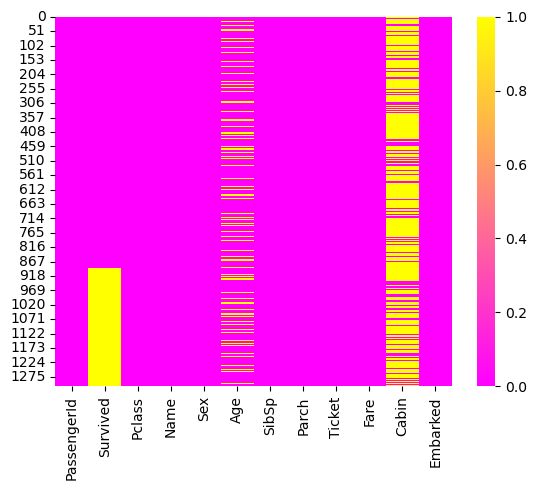

In [323]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

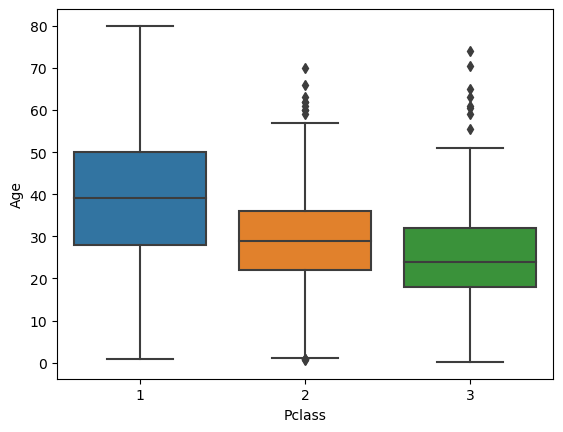

In [324]:
sns.boxplot(x='Pclass',y='Age', data=titanic)

In [325]:
##DROPPING COLUMNS

In [326]:
titanic = titanic.drop(columns = 'Cabin',axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [327]:
#we successfully droppedthe cabin column

In [328]:

#we will fill missing values using mean of those columnssince they are numerical values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [329]:
#filling missing values using mode of that column as it is categoriacal column.
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [330]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [331]:
#now only the column survived has null values for which we will remove it shortly 

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\1257111801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

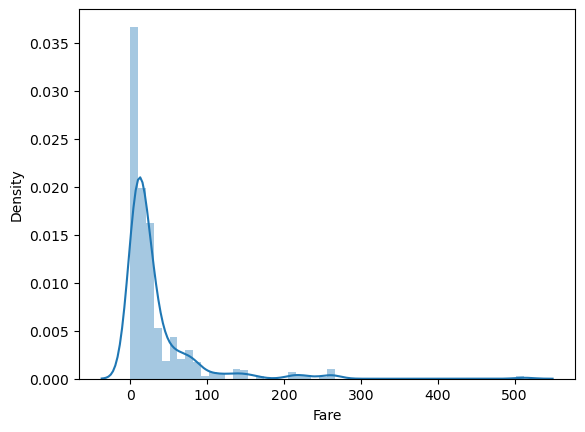

In [332]:
sns.distplot(titanic['Fare'])


In [333]:
titanic['Fare'] = np.log(titanic['Fare']+1)
#we have added +1 because in case the fare is zero or has null value it will throw error s

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\2359898376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

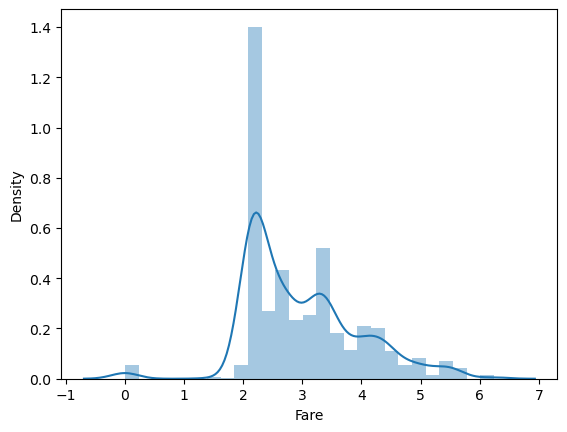

In [334]:

sns.distplot(titanic['Fare'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2236\3283234111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot = True)


<Axes: >

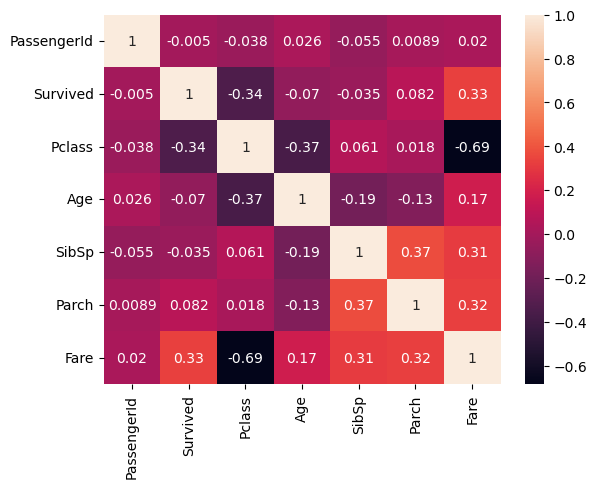

In [335]:
sns.heatmap(titanic.corr(), annot = True)

In [ ]:
#this heatmap tells us the correlation between data columns which can be expressed from -1 to 1 where closer the value to them, extreme is the prediction

Text(0.5, 1.0, 'Fare over Pclass graph of those who survived')

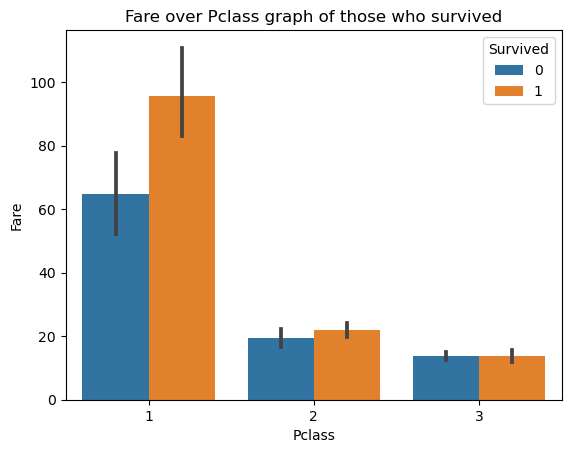

In [336]:
sns.barplot(data=train, x='Pclass',y='Fare', hue='Survived')
plt.title('Fare over Pclass graph of those who survived')

Text(0.5, 1.0, 'Fare of people who survived, categorised by different Pclass')

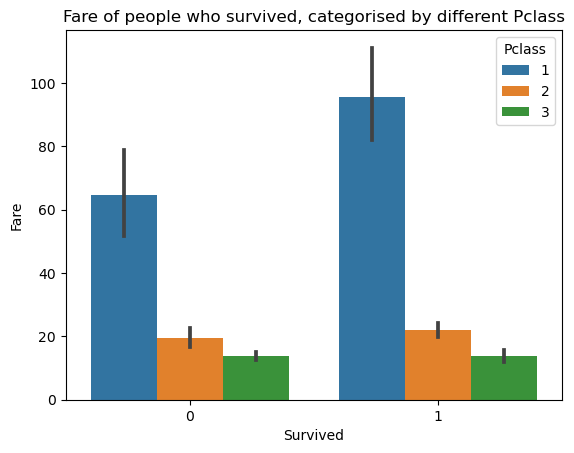

In [337]:
sns.barplot(data=train, x='Survived',y='Fare', hue='Pclass')
plt.title('Fare of people who survived, categorised by different Pclass')

In [ ]:
#  we can see that people belonging to higher classes have a higher chance of survival

In [338]:
titanic = titanic.drop(columns = ['Name','Ticket'], axis=1) 
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,2.110213,S
1,2,1.0,1,female,38.000000,1,0,4.280593,C
2,3,1.0,3,female,26.000000,0,0,2.188856,S
3,4,1.0,1,female,35.000000,1,0,3.990834,S
4,5,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,2.202765,S
1305,1306,NaN,1,female,39.000000,0,0,4.699571,C
1306,1307,NaN,3,male,38.500000,0,0,2.110213,S
1307,1308,NaN,3,male,29.881138,0,0,2.202765,S


In [339]:
#this will convert the categorical data into numerical data

In [340]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


# TRAIN  TEST SPLIT

In [341]:
train_len = len(train)
test_len = len(test)


# syntax :- iloc[starting row : ending row, starting column : ending column]

train = titanic.iloc[:train_len, :]
test = titanic.iloc[train_len:, :]
titanic.iloc

In [342]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0


In [343]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [344]:
#input split

x = train.drop(columns=['PassengerId','Survived'],axis = 1)
y = train['Survived']

#check the input attributes we gonna use for testing
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# MODEL TRAINING

In [345]:
#import the model
from sklearn.model_selection import train_test_split, cross_val_score

In [346]:
#we will divide the  training and testing rize as 80% and 20% respectively

In [347]:
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 4)
    model.fit(x_train, y_train)
    print('Accuracy: ',model.score(x_test, y_test))
    
    score = cross_val_score(model,x,y)
    print(score)
    print('Cross Validation Score: ', np.mean(score))

In [348]:
# Cross Validation Score helps to evaluate how well a model will generalize to new, unseen data. It score is a numerical metric that quantifies the model's performance during cross-validation

In [349]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy:  0.8324022346368715
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Cross Validation Score:  0.7833971502102819


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy:  0.8491620111731844
[0.76536313 0.78089888 0.80337079 0.74157303 0.80898876]
Cross Validation Score:  0.7800389178331555


In [351]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy:  0.8212290502793296
[0.78212291 0.80898876 0.85955056 0.78089888 0.85393258]
Cross Validation Score:  0.8170987383089574


In [ ]:
##here we get the accuracy of 82.12% which is quite good and doable

In [352]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [354]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [234]:
x_test = test.drop(columns=['PassengerId','Survived'],axis = 1)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.500000,0,0,2.178064,1
892,3,0,47.000000,1,0,2.079442,2
893,2,1,62.000000,0,0,2.369075,1
894,3,1,27.000000,0,0,2.268252,2
895,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,2.202765,2
1305,1,0,39.000000,0,0,4.699571,0
1306,3,1,38.500000,0,0,2.110213,2
1307,3,1,29.881138,0,0,2.202765,2


In [235]:
#show prediction results

pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [237]:
#importing the submission template file
sub = pd.read_csv('F:gender_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [238]:
#Replacing the Survived column of submission template with the survived data we predicted

sub['Survived'] = pred
sub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [239]:
#exporting the results to a csv file to be submitted.

sub.to_csv('predict result.csv', index = False)